##Configuration variables

In [ ]:
root = '/content/drive/My Drive/nlp-lab'
datasets_location = root + '/data/original-datasets/amazon-english-dataset'
processed_data_location = root + '/data/processed-data/amazon-english'

## Imports

In [ ]:
import nltk
nltk.download('punkt')
import pandas as pd
import gzip
import math
import numpy as np
from google.colab import drive
from sys import path
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


##Mount Drive

In [ ]:
drive.mount('/content/drive', force_remount=True)
path.append(root)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Load Datasets

In [ ]:
# <codecell> Read dataset
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

beauty_df = getDF(datasets_location + '/reviews_Beauty_5.json.gz')
grocery_and_gourmet_df = getDF(datasets_location + '/reviews_Grocery_and_Gourmet_Food_5.json.gz')
healt_and_personal_care_df = getDF(datasets_location + '/reviews_Health_and_Personal_Care_5.json.gz')

##Define strategy to extract sentiment from the ratings

In [ ]:
def getSentimentFromRating(rating):

    sentiment = "0"
    
    if rating < 3:
        sentiment = "n"
    elif rating == math.floor(3):
        sentiment = "0"
    else:
        sentiment = "p"
    
    return sentiment

##Function for processing a datframe

In [ ]:
def processDataFrame(dataframe):
    
    processed_df = pd.DataFrame(columns = ['comment_id','sentence_id','comment_rating','comment_sentiment','sentence_text','number_of_tokens','dataset_name'])
    number_of_rows = dataframe.shape[0]
    
    counter = 0
    for index, row in dataframe.iterrows():
        
        if counter%100 == 0:
            print('processed rows: ' + str(counter) + '/' + str(number_of_rows) + ' - percentage: ' + str(math.floor((counter/number_of_rows)*100)) + '%')
        counter += 1

        sentences = nltk.sent_tokenize(row["reviewText"])
        comment_rating = row["overall"]
        comment_sentiment = getSentimentFromRating(comment_rating)
        dataset_name = row["dataset_name"]
    
        sentence_id = 0
        for sentence in sentences: 
            number_of_tokens = len(nltk.word_tokenize(sentence))
            processed_df.loc[len(processed_df)] = [index,sentence_id,comment_rating,comment_sentiment,sentence,number_of_tokens,dataset_name]
            sentence_id += 1
            
    print('dataset processed')
            
    return processed_df

##Filter Datasets

In [ ]:
beauty_df_filtered = beauty_df[beauty_df['reviewText'].str.contains("organic",case=False)]
grocery_and_gourmet_df_filtered = grocery_and_gourmet_df[grocery_and_gourmet_df['reviewText'].str.contains("organic",case=False)]
healt_and_personal_care_df_filtered = healt_and_personal_care_df[healt_and_personal_care_df['reviewText'].str.contains("organic",case=False)]

##Concatenate datasets

In [ ]:
beauty_df_filtered['dataset_name']='beauty'
grocery_and_gourmet_df_filtered['dataset_name']='grocery_and_gourmet'
healt_and_personal_care_df_filtered['dataset_name']='health_and_personal_care'

complete_data_df = pd.concat([beauty_df_filtered, grocery_and_gourmet_df_filtered, healt_and_personal_care_df_filtered],ignore_index=True)

complete_data_df_processed.to_json(datasets_location + '/raw_data_english.json')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

##Process and export dataset

In [ ]:
#complete_data_df = complete_data_df.head(3)

complete_data_df_processed = processDataFrame(complete_data_df)
#complete_data_df_processed.to_json(processed_data_location + '/processed_data_without_embeddings_with_outliers.json')

processed rows: 0/15561 - percentage: 0%
processed rows: 100/15561 - percentage: 0%
processed rows: 200/15561 - percentage: 1%
processed rows: 300/15561 - percentage: 1%
processed rows: 400/15561 - percentage: 2%
processed rows: 500/15561 - percentage: 3%
processed rows: 600/15561 - percentage: 3%
processed rows: 700/15561 - percentage: 4%
processed rows: 800/15561 - percentage: 5%
processed rows: 900/15561 - percentage: 5%
processed rows: 1000/15561 - percentage: 6%
processed rows: 1100/15561 - percentage: 7%
processed rows: 1200/15561 - percentage: 7%
processed rows: 1300/15561 - percentage: 8%
processed rows: 1400/15561 - percentage: 8%
processed rows: 1500/15561 - percentage: 9%
processed rows: 1600/15561 - percentage: 10%
processed rows: 1700/15561 - percentage: 10%
processed rows: 1800/15561 - percentage: 11%
processed rows: 1900/15561 - percentage: 12%
processed rows: 2000/15561 - percentage: 12%
processed rows: 2100/15561 - percentage: 13%
processed rows: 2200/15561 - percentag

##Explore processed dataset

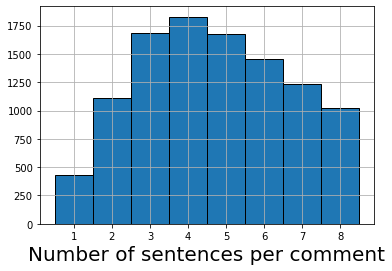

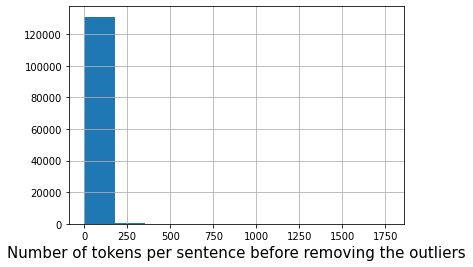

In [ ]:
#Number of sentences per comment
number_of_sentences_plot = complete_data_df_processed.groupby(['comment_id']).size().hist(bins=np.arange(0,9)+0.5, ec="k")
number_of_sentences_plot.set_xlabel("Number of sentences per comment",fontsize=20)
plt.show()

#Number of positive, negative and neutral sentiments in comments
ratings = complete_data_df.groupby(['overall']).size()
#Negative sentiment = 676 + 704 = 1380 -> 8.8683246578%
#Neutral sentiment = 1537 -> 9.87725724568%
#Positive sentiment = 12644 -> 81.2544180965%
#Total comments = 15561

#Number of tokens per sentence
tokens_per_sentence_plot = complete_data_df_processed["number_of_tokens"].hist() #Clearly, there are some outliers
tokens_per_sentence_plot.set_xlabel("Number of tokens per sentence before removing the outliers",fontsize=15)
plt.show()
#0.11419957517% of the dataset has more than 200 tokens
#0.1964232693of the dataset has more than 100 tokens


##Remove outliers and export data

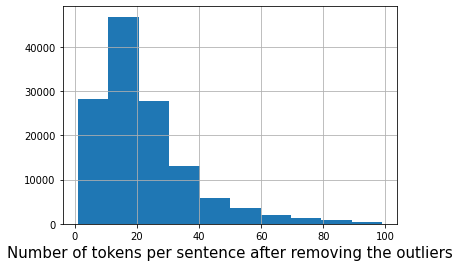

In [ ]:
#WARNING:
#if the outliers are removed, there will be childless comments (with no sentences available).

complete_data_df_processed = complete_data_df_processed[complete_data_df_processed['number_of_tokens'].apply(lambda x: x < 100)]
tokens_per_sentence_plot2 = complete_data_df_processed["number_of_tokens"].hist()
tokens_per_sentence_plot2.set_xlabel("Number of tokens per sentence after removing the outliers",fontsize=15)
complete_data_df_processed.to_json(processed_data_location + '/processed_data_without_embeddings_no_outliers.json')

In [ ]:
complete_data_df_processed.to_json('/tmp/processed_data_without_embeddings_no_outliers.json')